In [41]:
import numpy as np
import pandas as pd

In [42]:
df=pd.read_csv('placement-dataset.csv')

In [43]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [44]:
df.shape

(100, 4)

In [45]:
df.fillna(6.5) 

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,6.5,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0
...,...,...,...,...
95,Chicago,4.3,200.0,0
96,New York,4.4,42.0,0
97,Los Angeles,6.7,182.0,1
98,Chicago,6.3,103.0,1


In [46]:
df.isnull().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [47]:
df= df.interpolate()


C:\Users\siris\AppData\Local\Temp\ipykernel_24124\3917610619.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df= df.interpolate()


In [48]:
df.isnull().sum()

city         0
cgpa         0
iq           0
placement    0
dtype: int64

steps 

0. preprocess +EDA +FEATURE ENGINEERING
1. Ectract input and output cells
2. scale the values
3. train test split then train the model
4. evaluate the model/model selection'
5. deploy the model

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       100 non-null    float64
 2   iq         100 non-null    float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [50]:
import matplotlib.pyplot as plt

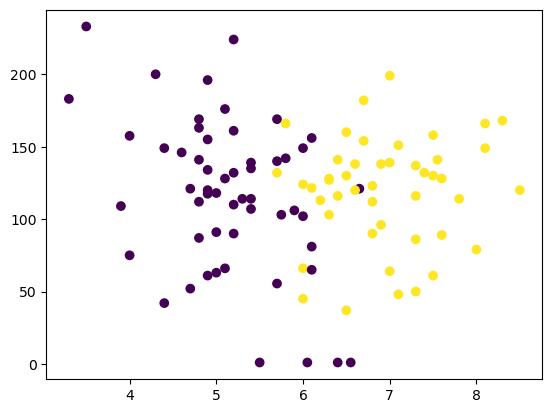

In [51]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [52]:
x=df.iloc[:,1:3]
x

,cgpa,iq
0,6.80,123.0
1,5.90,106.0
2,6.65,121.0
3,7.40,132.0
4,5.80,142.0
...,...,...
95,4.30,200.0
96,4.40,42.0
97,6.70,182.0
98,6.30,103.0


In [53]:
y=df.iloc[:,-1]

In [54]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [55]:
y.shape

(100,)

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [57]:
x_train

,cgpa,iq
62,6.0,102.0
54,6.4,141.0
38,6.5,160.0
4,5.8,142.0
34,4.8,163.0
...,...,...
70,6.3,127.0
50,3.5,233.0
80,4.9,196.0
23,4.8,87.0


In [58]:
x_test

,cgpa,iq
75,4.8,169.0
74,6.7,154.0
1,5.9,106.0
97,6.7,182.0
6,5.7,55.5
13,6.4,116.0
11,6.9,138.0
92,5.2,110.0
85,5.8,166.0
39,4.6,146.0


In [59]:
print(y_train,y_test)


62    0
54    1
38    1
4     0
34    0
     ..
70    1
50    0
80    0
23    0
84    0
Name: placement, Length: 90, dtype: int64 75    0
74    1
1     0
97    1
6     0
13    1
11    1
92    0
85    1
39    0
Name: placement, dtype: int64


In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [61]:
x_train=scaler.fit_transform(x_train)

In [62]:
x_train

array([[ 6.19027897e-03, -2.95575579e-01],
       [ 3.49036499e-01,  5.34732771e-01],
       [ 4.34748054e-01,  9.39241967e-01],
       [-1.65232831e-01,  5.56022729e-01],
       [-1.02234838e+00,  1.00311184e+00],
       [ 1.54899827e+00, -4.00960870e-02],
       [-8.50925271e-01,  4.50637438e-02],
       [-9.36636826e-01,  3.44187649e-02],
       [-9.36636826e-01,  8.32792179e-01],
       [-7.65213716e-01,  1.27988129e+00],
       [-2.30802171e+00,  1.42891099e+00],
       [ 8.63305829e-01, -1.10459397e+00],
       [-6.79502161e-01,  2.30179926e+00],
       [ 6.91882719e-01,  1.51513532e-01],
       [ 1.97755604e+00,  1.10956163e+00],
       [-6.79502161e-01, -5.51055072e-01],
       [ 4.34748054e-01,  3.00543236e-01],
       [-1.79375238e+00, -1.46545875e-01],
       [ 6.19027897e-03,  7.05052432e-01],
       [ 9.19018340e-02, -1.08330401e+00],
       [ 4.90460565e-02, -2.44586131e+00],
       [ 4.34748054e-01, -1.67942283e+00],
       [-1.02234838e+00, -8.26760024e-02],
       [ 9.

In [63]:
x_test=scaler.transform(x_test)
x_test

array([[-1.02234838,  1.13085159],
       [ 0.60617116,  0.81150222],
       [-0.07952128, -0.21041575],
       [ 0.60617116,  1.40762104],
       [-0.25094439, -1.28555861],
       [ 0.3490365 ,  0.00248383],
       [ 0.77759427,  0.4708629 ],
       [-0.67950216, -0.12525592],
       [-0.16523283,  1.06698171],
       [-1.19377149,  0.64118256]])

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
clf=LogisticRegression()

model training

In [66]:
clf.fit(x_train,y_train)

LogisticRegression()

In [67]:
# LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None,max_iter=100,
#                    multi_class='auto', n_jobs=None,penalty='12',
#                    random_state=None,solver='lbfgs',tol=0.0001,verbose=0,
#                    warm_start=False)

In [68]:
y_pred=clf.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,y_pred)

0.9

In [71]:
!pip install mlxtend

In [72]:
import mlxtend
print(mlxtend.__version__)


0.23.2


In [73]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

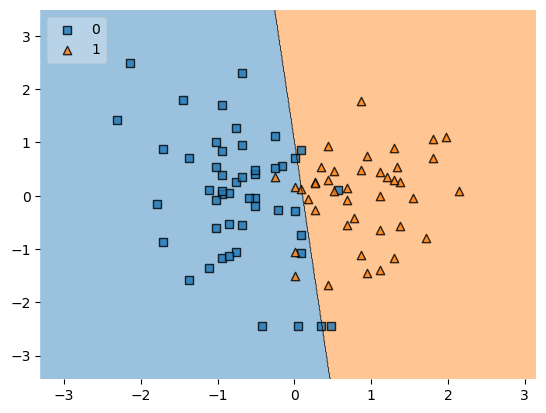

In [74]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [75]:
import pickle  #every thing is converted to file

In [76]:
pickle.dump(clf,open('model.pkl','wb'))